# Loading the libraries

In [403]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Data file

In [404]:
df = pd.read_csv('loan.csv')

In [405]:
# Looking at the top 5 rows to understand data
pd.set_option('display.max_columns', None)

df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Size of Dataset

In [406]:
df.shape

(39717, 111)

# Describing Info

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [408]:
## Understanding the percentage of null values in the data
(df.isnull().sum().sum())/(df.shape[0]*df.shape[1])

0.5133989643393677

# Data Cleaning

In [409]:
## Dropping columns where all values are null. Below in sequence all columns have null values

df.drop(df.iloc[:, 53:105], inplace = True, axis = 1) 

In [410]:
df.shape

(39717, 59)

In [411]:
## Drop additional columns we don't need these as these are mostly nulls.

columns_drop_list1 = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim","mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit","member_id","url","emp_title","zip_code","tax_liens"]
df.drop(labels = columns_drop_list1, axis =1, inplace=True)

In [412]:
df.shape

(39717, 45)

In [413]:
## Drop additional columns we don't need these as these are mostly nulls.
col_uni = df.nunique()
print(col_uni)
col = col_uni[col_uni.values == 1]
col.index

id                            39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
title                         19615
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21711
revol_util                     1089
total_acc                   

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type'],
      dtype='object')

In [414]:
df.drop(columns = list(col.index), inplace=True)
df.shape

(39717, 40)

In [415]:
## Delete unwanted columns  that are created after a loan application is approved doesn't make sense in analysis
del_cols = ["out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
df.drop(columns=del_cols, inplace=True)
df.shape

(39717, 28)

In [416]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  object 
 5   int_rate              39717 non-null  object 
 6   installment           39717 non-null  float64
 7   grade                 39717 non-null  object 
 8   sub_grade             39717 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [417]:
df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,6.831319e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260
std,2.106941e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324
min,5.473400e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5.162210e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000
50%,6.656650e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000
75%,8.377550e+05,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


In [418]:
## Data cleaning
## Removing % symbol from intrest rate column 
df['int_rate'] = df['int_rate'].str.rstrip('%')

## removing % symbol from revol_util column
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [419]:
(df.purpose.value_counts()*100)/len(df)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

In [420]:
## Two new columns can be created from issue date, month and year to help in analysis.

df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df['year']=df['issue_d'].dt.year
df['month']=df['issue_d'].dt.month

df.head(1)

## Observations
## Two new columns month and year were derived from issue date

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0,2011,12


In [421]:
df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,year,month
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000,39717.000000,39717.000000
mean,6.831319e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260,2010.328902,7.172168
std,2.106941e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324,0.877514,3.396910
min,5.473400e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2007.000000,1.000000
25%,5.162210e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,2010.000000,4.000000
50%,6.656650e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,2011.000000,7.000000
75%,8.377550e+05,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,2011.000000,10.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000,2011.000000,12.000000


In [422]:
loan_status_percent = loan['loan_status'].value_counts(normalize=True)
loan_status_percent

Fully Paid     0.829345
Charged Off    0.142018
Current        0.028638
Name: loan_status, dtype: float64

In [423]:
## Since loan status "Current" doesnt give any info for our analysis for approving or rejecting application, so dropping this data makes sense
loan = df[~(df['loan_status'] == 'Current')]
df.shape

(39717, 30)

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39717 non-null  int64         
 1   loan_amnt             39717 non-null  int64         
 2   funded_amnt           39717 non-null  int64         
 3   funded_amnt_inv       39717 non-null  float64       
 4   term                  39717 non-null  object        
 5   int_rate              39717 non-null  object        
 6   installment           39717 non-null  float64       
 7   grade                 39717 non-null  object        
 8   sub_grade             39717 non-null  object        
 9   emp_length            38642 non-null  object        
 10  home_ownership        39717 non-null  object        
 11  annual_inc            39717 non-null  float64       
 12  verification_status   39717 non-null  object        
 13  issue_d         

# Removing Outliers


In [425]:
df['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [426]:
print('Before Removal of Outliers :\n')
print(df['annual_inc'].describe())

## Data cleaning
## Remove Outliers quantile .99 from Annual Income
## it will make it easier to visualize the plots.

loan = df[df["annual_inc"] < df["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(loan["annual_inc"].describe())

## Final Data for Analysis arrived

Before Removal of Outliers :

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
After Removal of Outliers :
count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

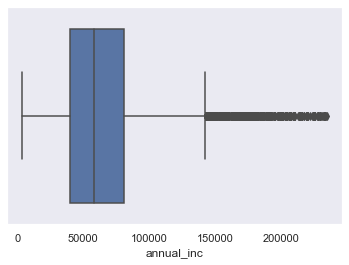

In [427]:
sns.boxplot(loan.annual_inc)

# Univariate Analysis

In [428]:
## Changing the loan_status to a numeric , assign 1 for defaulted loans and 0 for paid off ones
loan['loan_status_num'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [429]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month,loan_status_num
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0,2011,12,0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.0,2011,12,1
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.0,2011,12,0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.0,2011,12,0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,0.0,2011,12,0


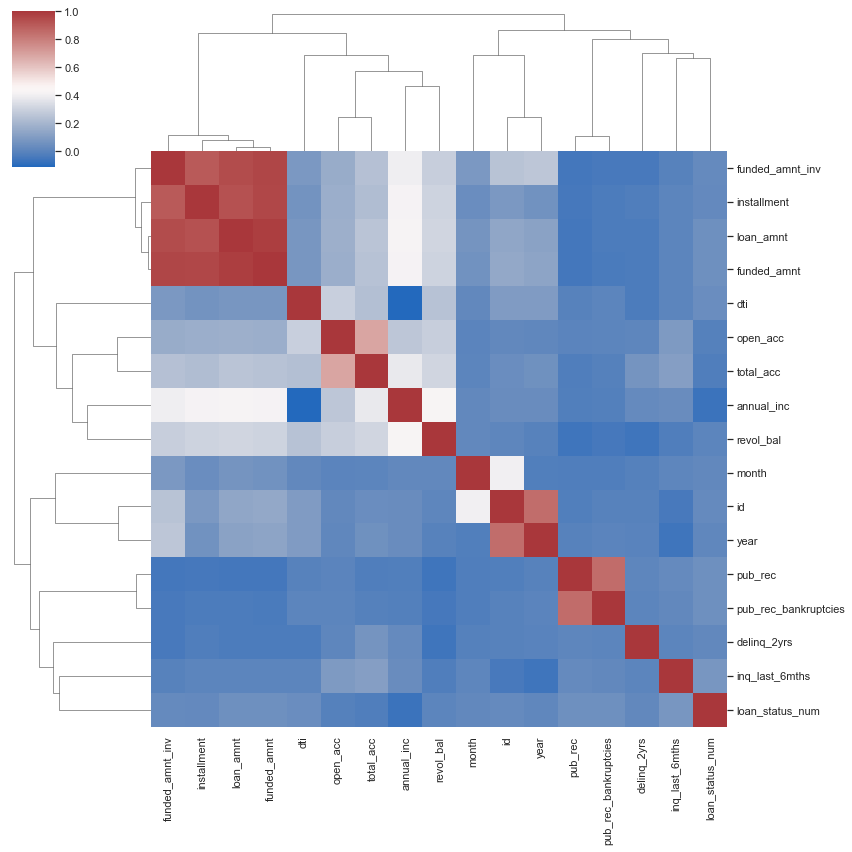

In [430]:
sns.set_style("whitegrid")
sns.clustermap(data=loan.corr(), cmap='vlag', figsize=(12,12))
plt.show()

Since we know darker the value higher the correlation, we can clearly see loan_amnt, funded_amnt, funded_amnt_inv and installment have huge correlation to each other. Also, the public records related fields pub_rec & pub_rec_bankrupcies and number of accounts related fields open_acc & total_acc are correlated.

Unordered Categorical Variables

In [431]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39319 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39319 non-null  int64         
 1   loan_amnt             39319 non-null  int64         
 2   funded_amnt           39319 non-null  int64         
 3   funded_amnt_inv       39319 non-null  float64       
 4   term                  39319 non-null  object        
 5   int_rate              39319 non-null  object        
 6   installment           39319 non-null  float64       
 7   grade                 39319 non-null  object        
 8   sub_grade             39319 non-null  object        
 9   emp_length            38249 non-null  object        
 10  home_ownership        39319 non-null  object        
 11  annual_inc            39319 non-null  float64       
 12  verification_status   39319 non-null  object        
 13  issue_d         

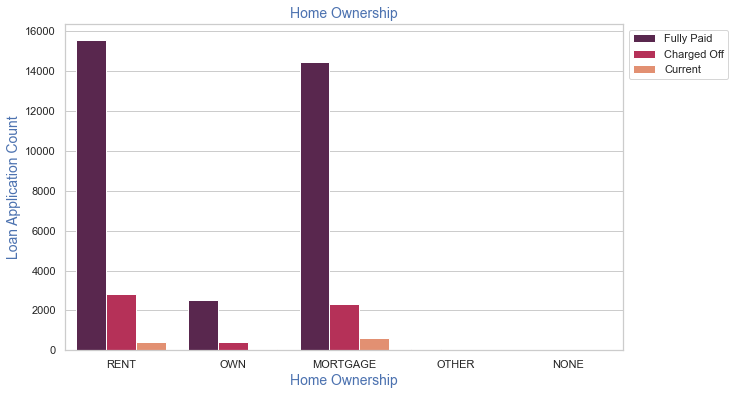

In [432]:
## Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='rocket')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='b')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()

## Below plot shows that most of them living in rented home or have mortgaged their home.
## So when Applicant numbers are high charged off is high too.

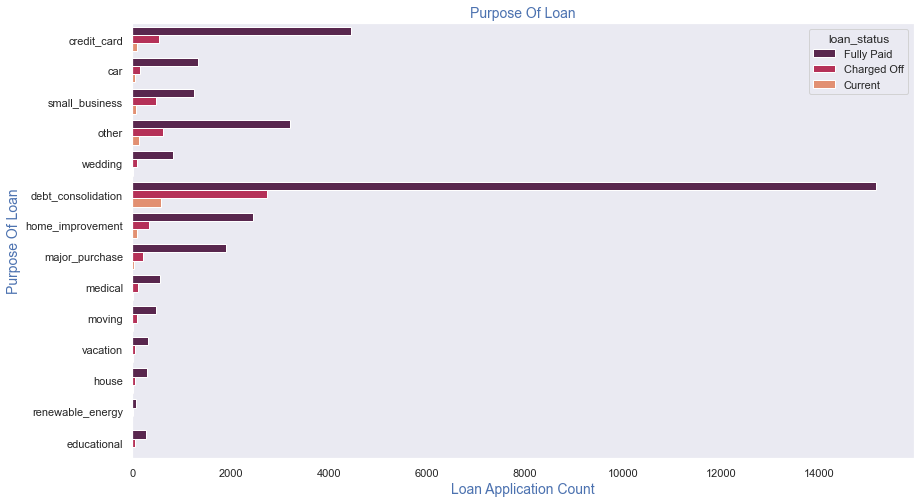

In [433]:
## Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8),facecolor='w')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='rocket')
ax.set_title('Purpose Of Loan',fontsize=14,color='b')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()

## Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
## The Number of chraged off count is high for these loans.

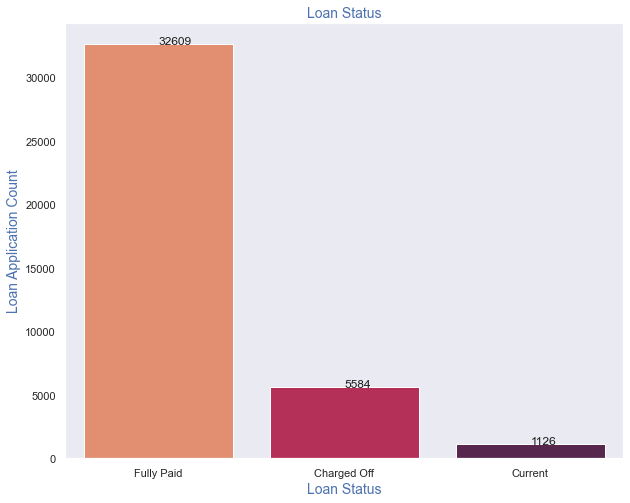

In [434]:
## Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8),facecolor='w')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=loan,palette='rocket_r')
ax.set_title('Loan Status',fontsize=14,color='b')
ax.set_xlabel('Loan Status',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')            
# To show count of values above bars
s=loan['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

## Below plot shows that close to 14% loans were charged off out of total loan issued.

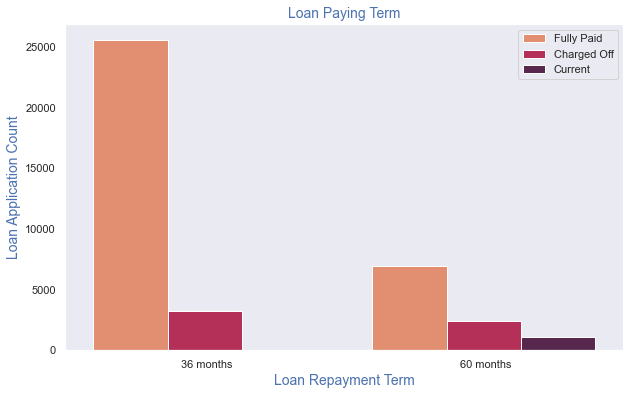

In [435]:
## Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x="term",data=loan,hue='loan_status',palette='rocket_r')
ax.set_title('Loan Paying Term',fontsize=14,color='b')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

## Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
## charged off as compared to applicants who had taken loan for 36 months.

Ordered Categorical Variables

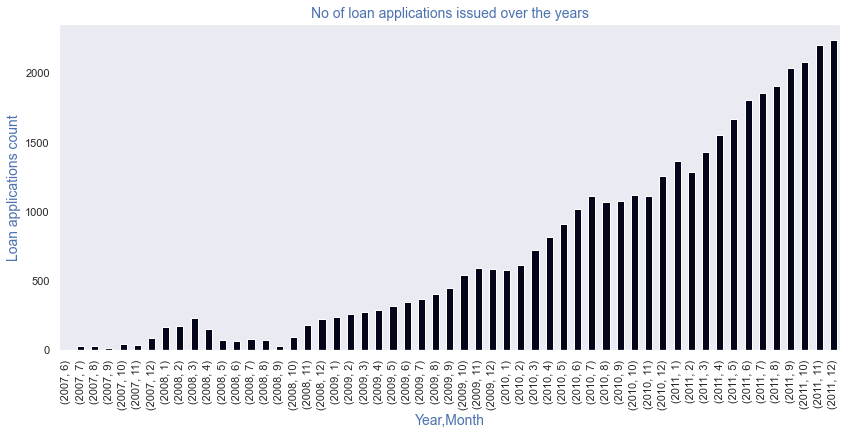

In [436]:
## The number of loans which were approved every year/month
plt.figure(figsize=(14,6),facecolor='w')
loan.groupby(['year','month']).id.count().plot(kind='bar',cmap='rocket')
plt.ylabel('Loan applications count',fontsize=14,color='b')
plt.xlabel('Year,Month',fontsize=14,color = 'b')      
plt.title("No of loan applications issued over the years",fontsize=14,color='b')
plt.show()


## The count of loan application is increasing every passing year. So increase in number of loan applications are adding more to number of charged off applications.

In [437]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39319 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39319 non-null  int64         
 1   loan_amnt             39319 non-null  int64         
 2   funded_amnt           39319 non-null  int64         
 3   funded_amnt_inv       39319 non-null  float64       
 4   term                  39319 non-null  object        
 5   int_rate              39319 non-null  object        
 6   installment           39319 non-null  float64       
 7   grade                 39319 non-null  object        
 8   sub_grade             39319 non-null  object        
 9   emp_length            38249 non-null  object        
 10  home_ownership        39319 non-null  object        
 11  annual_inc            39319 non-null  float64       
 12  verification_status   39319 non-null  object        
 13  issue_d         

In [438]:
loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month,loan_status_num
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0,2011,12,0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.0,2011,12,1
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.0,2011,12,0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.0,2011,12,0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,0.0,2011,12,0



# Bivariate Analysis

In [439]:
## Derived columns
## Bucketing loan amounts to help in analysis.
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

## Bucketing annual incomes to help in analysis.
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

## Bucketing dti to help in analysis..
loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])


In [440]:
## Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

## Income range 80000+  has less chances of charged off.
## Income range 0-20000 has high chances of charged off.
## Notice that with increase in annual income charged off proportion got decreased.

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.199327
1,20000-40000,1514,170,7004,8688,0.174263
2,40000-60000,1729,345,9534,11608,0.148949
3,60000-80000,1024,240,6597,7861,0.130263
4,80000 +,1080,362,8531,9973,0.108292


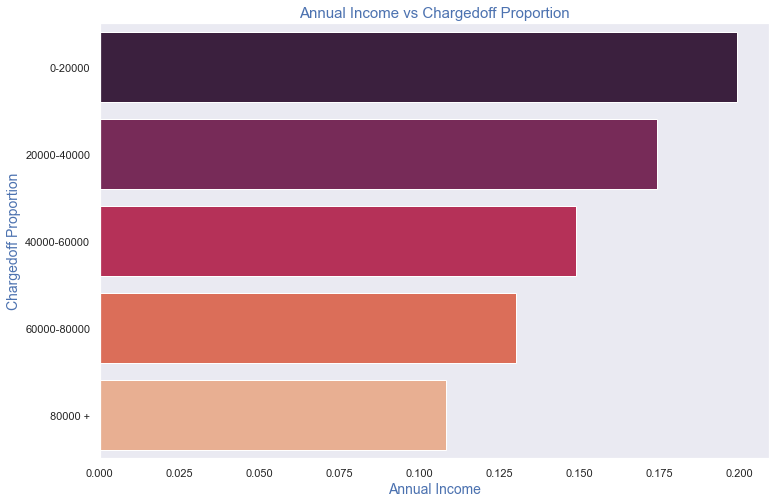

In [441]:
## The bar plots on data calculated above.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'b')
ax1=sns.barplot(x='Chargedoff_Proportion',y='annual_inc_cats',data=inc_range_vs_loan,palette="rocket")
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
ax1.set_xlabel('Annual Income',fontsize=14,color='b')
plt.show()

## Income range 80000+  has less chances of charged off.
## Income range 0-20000 has high chances of charged off.
## Notice that with increase in annual income charged off proportion got decreased. 

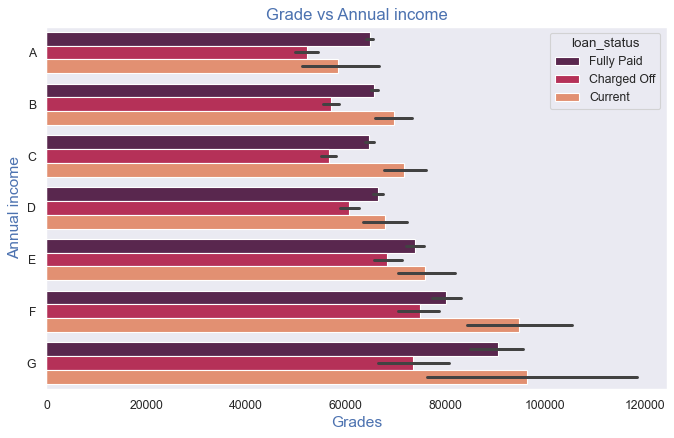

In [442]:
## Bivariate analysis
## BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
ax=sns.barplot(x='annual_inc',y='grade', hue="loan_status", data=loan, estimator=np.mean,order='ABCDEFG',palette="rocket")
ax.set_title('Grade vs Annual income',fontsize=15,color='b')
ax.set_ylabel('Annual income',fontsize=14,color = 'b')
ax.set_xlabel('Grades',fontsize=14,color = 'b')
plt.show()

## From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
## who'paid fully' for each and every grade (i.e. at same interest range)

# The End